# Phase 2 - Milestones 2

## i. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

- Name : Muhammad Irham Dinan
- Batch : FTDS-012
- Dataset : `https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs`.
- Objective : "Identifying Disease in Tea leaves Using convolutional neural network."

## ii. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Functional, clone_model
from keras.layers import Dropout, Dense, BatchNormalization, Input, concatenate, Flatten, Conv2D, MaxPool2D, Activation
from keras import regularizers, initializers, Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers, initializers, Model

## iii. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir /content/kaggle

In [4]:
!chmod 600 /content/kaggle/kaggle.json

In [5]:
!KAGGLE_CONFIG_DIR=/content/kaggle/ kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

 97% 721M/740M [00:11<00:00, 80.9MB/s]
100% 740M/740M [00:11<00:00, 66.0MB/s]


In [6]:
!unzip ./identifying-disease-in-tea-leafs.zip

Archive:  ./identifying-disease-in-tea-leafs.zip
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143242.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143328.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143336.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143344.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143352.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143401.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143424.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143433.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143441.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143451.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143501.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143511.jpg  
  inflating: tea sickness dataset/Anthracnose/IMG_20220503_143525.jpg  
  inflating: te

dataset has been successfully loaded from kaggle.

## iv. Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [7]:
# Define path or directory of files

dataset_path = '/content/tea sickness dataset/'
algal_leaf_path = '/content/tea sickness dataset/algal leaf'
anthracnose_path = '/content/tea sickness dataset/Anthracnose'
bird_eye_spot_path = '/content/tea sickness dataset/bird eye spot'
brown_blight_path = '/content/tea sickness dataset/brown blight'
gray_light_path = '/content/tea sickness dataset/gray light'
healthy_path = '/content/tea sickness dataset/healthy'
red_leaf_spot_path = '/content/tea sickness dataset/red leaf spot'
white_spot_path = '/content/tea sickness dataset/white spot'

dataset_path = pathlib.Path(dataset_path)
algal_leaf_path = pathlib.Path(algal_leaf_path)
anthracnose_path = pathlib.Path(anthracnose_path)
bird_eye_spot_path = pathlib.Path(bird_eye_spot_path)
brown_blight_path = pathlib.Path(brown_blight_path)
gray_light_path = pathlib.Path(gray_light_path)
healthy_path = pathlib.Path(healthy_path)
red_leaf_spot_path = pathlib.Path(red_leaf_spot_path)
white_spot_path = pathlib.Path(white_spot_path)



In [8]:
# Display images count

total_images = len(list(dataset_path.glob('*/*.jpg')))
algal_leaf_images = list(algal_leaf_path.glob('*.jpg'))
anthracnose_images = list(anthracnose_path.glob('*.jpg'))
bird_eye_spot_images = list(bird_eye_spot_path.glob('*.jpg'))
brown_blight_images = list(brown_blight_path.glob('*.jpg'))
gray_light_images = list(gray_light_path.glob('*.jpg'))
healthy_images = list(healthy_path.glob('*.jpg'))
red_leaf_spot_images = list(red_leaf_spot_path.glob('*.jpg'))
white_spot_images = list(white_spot_path.glob('*.jpg'))

tea_leaves = [algal_leaf_images, anthracnose_images, bird_eye_spot_images, brown_blight_images, gray_light_images, healthy_images, red_leaf_spot_images, white_spot_images]
tea_leaves_name = {0: 'algal leaf', 1: 'anthracnose', 2: 'bird eye spot', 3: 'brown blight', 4: 'gray light', 5: 'healthy leaf', 6: 'red leaf spot', 7: 'white spot'}

print('Total all images \t\t:', total_images)

for i, tea in enumerate(tea_leaves):
    length = len(tea)
    print('Total {} images \t: {}'.format(tea_leaves_name[i], length))

Total all images 		: 885
Total algal leaf images 	: 113
Total anthracnose images 	: 100
Total bird eye spot images 	: 100
Total brown blight images 	: 113
Total gray light images 	: 100
Total healthy leaf images 	: 74
Total red leaf spot images 	: 143
Total white spot images 	: 142


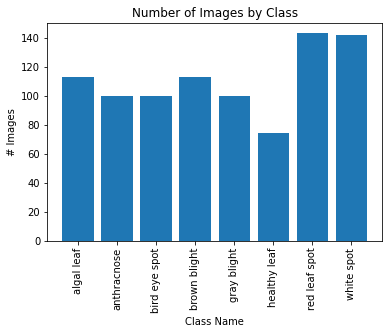

In [9]:
# Visualize image counts

classes_len = { 'algal leaf' : len(algal_leaf_images),
            'anthracnose': len(anthracnose_images),
            'bird eye spot': len(bird_eye_spot_images),
            'brown blight': len(brown_blight_images),
            'gray blight': len(gray_light_images), 
            'healthy leaf': len(healthy_images),  
            'red leaf spot': len(red_leaf_spot_images), 
            'white spot': len(white_spot_images)
          }
plt.bar(classes_len.keys(), classes_len.values());
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.xticks(rotation=90)
plt.ylabel('# Images');

This tea sickness dataset contains tea leaves showing 7 common diseases of tea: (1) Algal leaf; (2) Anthracnose; (3) Bird’s eyespot; (4) Brown blight; (5) Gray blight; (6) Red leaf spot; (7) White leaf spot. The dataset further contains a class of healthy tea leaves.  Each of the classes of diseases of tea leaves contains at least 100 images and healty tea leaves contains 74 images.

Class :  algal leaf


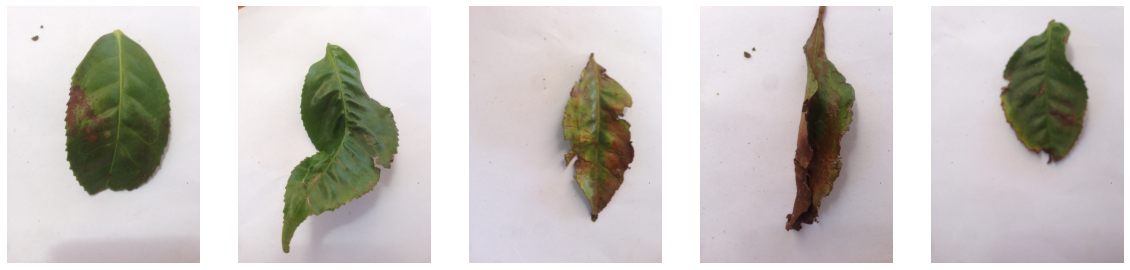

Class :  anthracnose


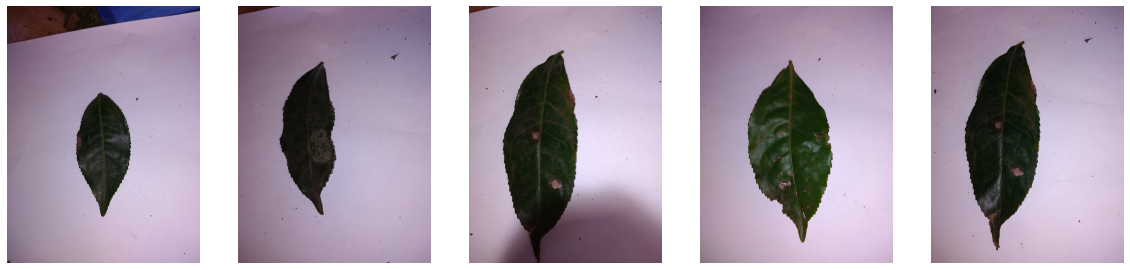

Class :  bird eye spot


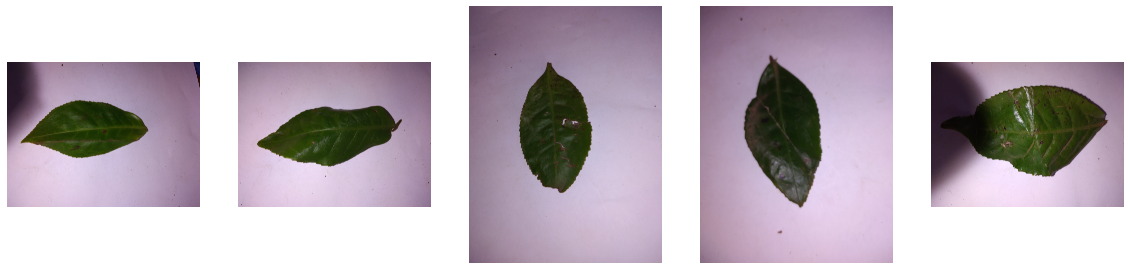

Class :  brown blight


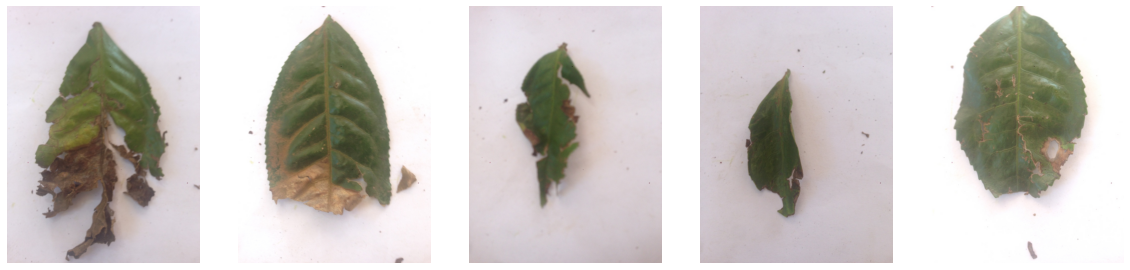

Class :  gray blight


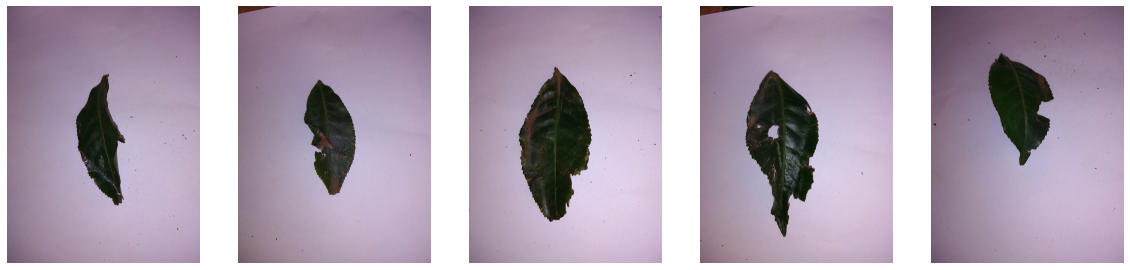

Class :  healthy leaf


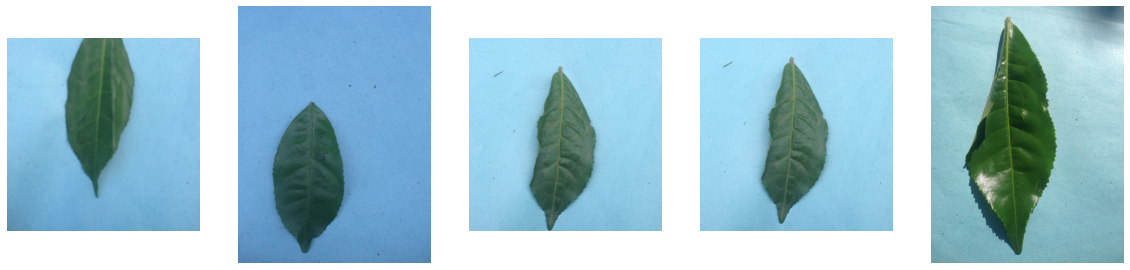

Class :  red leaf spot


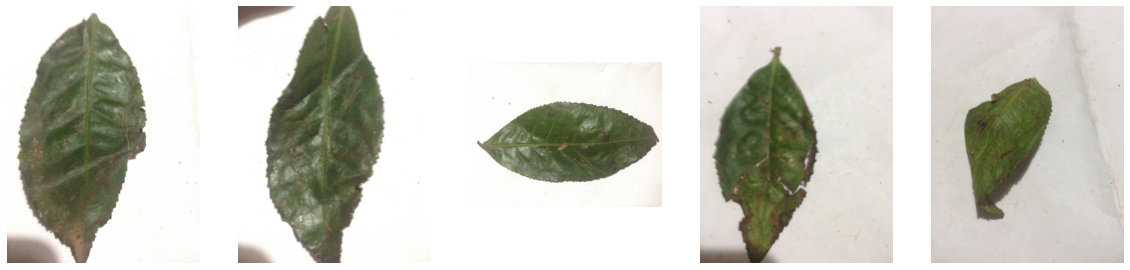

Class :  white spot


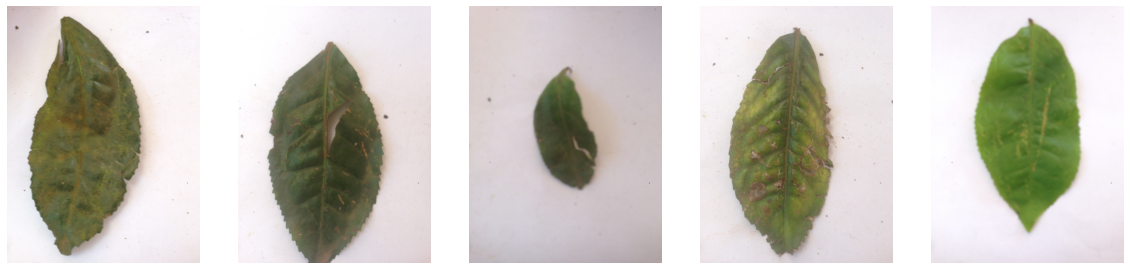

In [10]:
# Visualize the first 5 images of each class

classes = { 'algal leaf' : algal_leaf_images,
            'anthracnose': anthracnose_images,
            'bird eye spot': bird_eye_spot_images,
            'brown blight': brown_blight_images,
            'gray blight': gray_light_images, 
            'healthy leaf': healthy_images,  
            'red leaf spot': red_leaf_spot_images, 
            'white spot': white_spot_images
          }

for cls in classes.keys():
  folder_name = classes[cls]
  fig = plt.figure(figsize=(20, 20))
  columns = 5
  rows = 1
  print('Class : ', cls)
  for index in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, index)
      image = plt.imread(str(folder_name[index]))
      plt.imshow(image)
      plt.axis("off")
  plt.show()


From the preview images from each classes, we can see that each leaves have different particular characteristics from their own color, their rip, or their spotness.

Some of group of Classes are easily to be distinguished as object since the backgrounds are quite contrast to the leaf while the others are probably not taken pictures in proper lighting, such as class: anthracnose, bird eye spot, and gray light. 

In [11]:
# Check dimension of images

for cls in classes.keys():
  folder_name = classes[cls]
  print('Class : ', cls)
  for index in range(len(classes[cls])):
      image = plt.imread(str(folder_name[index]))
      h, w, c = image.shape
      print('height: {}, width: {}, Channel/Color Spectrum: {} - RGB if 3, Grayscale if 1'.format(h, w, c))

Class :  algal leaf
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channel/Color Spectrum: 3 - RGB if 3, Grayscale if 1
height: 1024, width: 768, Channe

From the enlisted dimension from each classes, we can see that all images are RGB with 3 channel of color spectrum. algal leaf has same dimension: 1024 x 768, anthracnose mostly has same dimension with different orientation: portrait 4160 x 3120 and landscape 3120 x 4160, bird eye spot mostly has same dimension with different orientation: portrait 4160 x 3120 and landscape 3120 x 4160, brown blight has same dimension: 1024 x 768, healthy mostly has two dimensions: 1024 x 768 & 1024 x 1024, and red leaf spot mostly has similiar dimension: 1024 x 768.

## v. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [12]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Splitting Folders

In [13]:
import splitfolders

splitfolders.ratio("tea sickness dataset", output="output",
    seed=25, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 885 files [00:00, 1005.73 files/s]


#### Preprocessing - Set Data Generator

In [14]:
# Predefine parameters

batch_size = 32
img_height = 224
img_width = 224

*Create two type of preprocessing of images by rescaling only and augmented: rescaling + rotation (20%) + zoom (20%) + horizontal flip since images typically still make sense if we slightly rotate or zoom or horizontal flip.*

In [15]:
tf.random.set_seed(25)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set directory data
train_dir = "output/train/"
val_dir = "output/val/"
test_dir = "output/test/"

# Set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25,
                                               shuffle=False)

test_data = valid_datagen.flow_from_directory( test_dir,
                                               batch_size=batch_size,
                                               target_size=(img_height, img_width),
                                               class_mode="categorical",
                                               seed=25,
                                               shuffle=False)

Found 706 images belonging to 8 classes.
Found 706 images belonging to 8 classes.
Found 87 images belonging to 8 classes.
Found 92 images belonging to 8 classes.


## vi. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In this case, an objectives which is expected to be performed is computer vision with Convolutional Neural Network model that able to identify classification of disease in tea leaves from dataset. Hence, there are two types of convolutionl neural network which will be trained and evaluated as follows:

1. **CNN - Sequential API** 
2. **CNN - Functional API**

## vii. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### CNN - Sequential API

#### Build 1st Sequential API Model

*Building with 3 layers convolutional2D with different filters (16, 32, 64) with 3x3 & maxpool2D, then flattening prior fully-connected neural-networking with 1 hidden layers (with 32 neurons). All activation function are using relu*

In [16]:
# Declare 1st Sequential API model
model_s1 = Sequential()

# convolutional + maxpooling
model_s1.add(Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)))
model_s1.add(MaxPool2D(2))

model_s1.add(Conv2D(32, 3, activation='relu'))
model_s1.add(MaxPool2D(2))

model_s1.add(Conv2D(64, 3, activation='relu'))
model_s1.add(MaxPool2D(2))

# flattening
model_s1.add(Flatten())

# neural-networking
model_s1.add(Dense(32, activation='relu'))
model_s1.add(Dense(8, activation='softmax'))



*Using optimizer 'adam' refers to most favorable optimizer, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning*

In [17]:
# model-compiling
model_s1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

*Using input train_data for training and valid_data for validation, with 30 epochs for model learning, and ReduceLROnPlateau callbacks*

In [18]:
# Train 1st Sequential API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s1 = model_s1.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 62s 2s/step - loss: 1.8543 - accuracy: 0.2436 - val_loss: 1.4027 - val_accuracy: 0.4023 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 50s 2s/step - loss: 1.2152 - accuracy: 0.4235 - val_loss: 1.2121 - val_accuracy: 0.4253 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 49s 2s/step - loss: 1.0621 - accuracy: 0.5354 - val_loss: 1.2317 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 49s 2s/step - loss: 0.8898 - accuracy: 0.6360 - val_loss: 1.0888 - val_accuracy: 0.5632 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 49s 2s/step - loss: 0.7766 - accuracy: 0.6657 - val_loss: 1.0080 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 50s 2s/step - loss: 0.6402 - accuracy: 0.7380 - val_loss: 1.9729 - val_accuracy: 0.3563 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 49s 2s/step - loss: 0.8087 - a

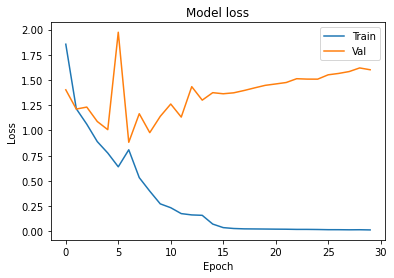

In [19]:
# Plot loss & accuracy of 1st Sequential API model

plt.plot(history_s1.history['loss'])
plt.plot(history_s1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

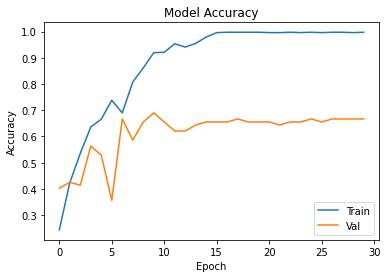

In [20]:
plt.plot(history_s1.history['accuracy'])
plt.plot(history_s1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 1st CNN sequential API model indicates both loss and accuracy are divergent. Learning curve in train set its loss function significantly decreases into 0,01 meanwhile in valid set its loss function moves divergent to 1,60. The train set's accuracy indicates 0,99 which means too good to be true while the valid set's accuracy stucks in 0,66. It is a clear sign in which this model tends to overfitting.

In [21]:
# save trained model_s1
model_s1.save('model_s1.h5')

#### Build 2nd Sequential API Model

*Building with 3 layers convolutional2D with different filters (16, 32, 64) with 3x3 & maxpool2D, then flattening prior fully-connected neural-networking with 1 hidden layers (with 32 neurons) then setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. All activation function are using relu*

In [22]:
# Declare 2nd Sequential API model
model_s2 = Sequential()

# convolutional + maxpooling
model_s2.add(Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)))
model_s2.add(MaxPool2D(2))

model_s2.add(Conv2D(32, 3, activation='relu'))
model_s2.add(MaxPool2D(2))

model_s2.add(Conv2D(64, 3, activation='relu'))
model_s2.add(MaxPool2D(2))

# flattening
model_s2.add(Flatten())

# neural-networking
model_s2.add(Dense(32, activation='relu'))
model_s2.add(Dropout(0.3))
model_s2.add(Dense(8, activation='softmax'))


*Using optimizer 'adam' refers to most favorable optimizer, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning*

In [23]:
# model-compiling
model_s2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

*Using input train_data_augmented for training and valid_data for validation, with 30 epochs for model learning, and ReduceLROnPlateau callbacks*

In [24]:
# Train 2nd Sequential API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s2 = model_s2.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 59s 3s/step - loss: 1.8923 - accuracy: 0.2139 - val_loss: 1.6809 - val_accuracy: 0.2299 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 55s 2s/step - loss: 1.6643 - accuracy: 0.2677 - val_loss: 1.4429 - val_accuracy: 0.3563 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 55s 2s/step - loss: 1.5140 - accuracy: 0.3513 - val_loss: 1.3605 - val_accuracy: 0.3448 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 55s 2s/step - loss: 1.4548 - accuracy: 0.3499 - val_loss: 1.2851 - val_accuracy: 0.3448 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 55s 2s/step - loss: 1.3590 - accuracy: 0.3938 - val_loss: 1.1359 - val_accuracy: 0.4598 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 55s 2s/step - loss: 1.2743 - accuracy: 0.4405 - val_loss: 1.1288 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 55s 2s/step - loss: 1.2482 - a

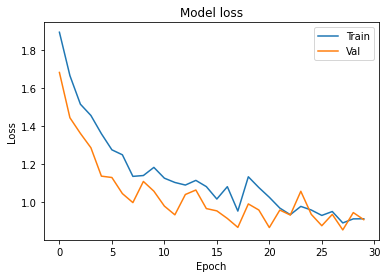

In [25]:
# Plot loss & accuracy of 2nd Sequential API model

plt.plot(history_s2.history['loss'])
plt.plot(history_s2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

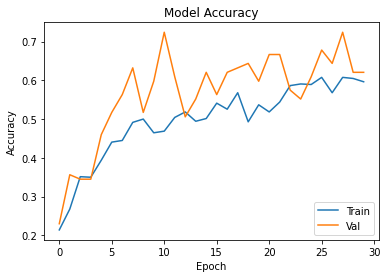

In [26]:
plt.plot(history_s2.history['accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 2nd CNN sequential API model indicates both loss and accuracy are in same trendline. However, learning curve in both train set  & valid set their loss function slowly decreases into 0,90. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,61. Actually, this model shows same typical trends for both loss and accuracy, but the value are still quite far from good fit.

In [27]:
# save trained model_s2
model_s2.save('model_s2.h5')

#### Build 3rd Sequential API Model

*Building with 3 layers convolutional2D with different filters (16, 32, 64) with 3x3, batch normalization, & maxpool2D, then flattening prior fully-connected neural-networking with 2 hidden layers (with 128 & 32 neurons), and setting up dropout 0.5 & 0.3 which means that the neurons in the previous layer has a probability of 0.5 & 0.3 in dropping out during training. All activation function are using relu*

In [28]:
# Declare 3rd Sequential API model
model_s3 = Sequential()

# convolutional + maxpooling
model_s3.add(Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)))
model_s3.add(MaxPool2D(2))

model_s3.add(Conv2D(32, 3, activation='relu'))
model_s3.add(MaxPool2D(2))

model_s3.add(Conv2D(64, 3, activation='relu'))
model_s3.add(MaxPool2D(2))

# flattening
model_s3.add(Flatten())

# neural-networking
model_s3.add(Dense(128, activation='relu'))
model_s3.add(Dropout(0.5))
model_s3.add(Dense(32, activation='relu'))
model_s3.add(Dropout(0.3))
model_s3.add(Dense(8, activation='softmax'))


*Changing optimizer 'RMSprop' known as the state of learning rate with predefined lr = 0.0001, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning*

In [30]:
# model-compiling
model_s3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

*Using input train_data_augmented for training and valid_data for validation, with 30 epochs for in model learning, and ReduceLROnPlateau callbacks*



In [31]:
# Train 3rd Sequential API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_s3 = model_s3.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 59s 3s/step - loss: 2.0960 - accuracy: 0.1459 - val_loss: 1.9902 - val_accuracy: 0.2759 - lr: 1.0000e-04
Epoch 2/30
23/23 [==============================] - 55s 2s/step - loss: 1.9714 - accuracy: 0.2139 - val_loss: 1.8497 - val_accuracy: 0.2759 - lr: 1.0000e-04
Epoch 3/30
23/23 [==============================] - 55s 2s/step - loss: 1.8693 - accuracy: 0.2691 - val_loss: 1.7583 - val_accuracy: 0.3218 - lr: 1.0000e-04
Epoch 4/30
23/23 [==============================] - 55s 2s/step - loss: 1.8383 - accuracy: 0.2493 - val_loss: 1.6627 - val_accuracy: 0.2989 - lr: 1.0000e-04
Epoch 5/30
23/23 [==============================] - 55s 2s/step - loss: 1.7723 - accuracy: 0.2805 - val_loss: 1.5866 - val_accuracy: 0.3103 - lr: 1.0000e-04
Epoch 6/30
23/23 [==============================] - 55s 2s/step - loss: 1.7069 - accuracy: 0.3215 - val_loss: 1.5311 - val_accuracy: 0.2989 - lr: 1.0000e-04
Epoch 7/30
23/23 [==============================] - 55s 2s

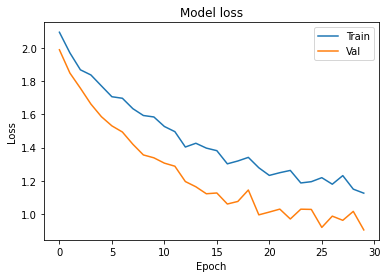

In [32]:
# Plot loss & accuracy of 3rd Sequential API model

plt.plot(history_s3.history['loss'])
plt.plot(history_s3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

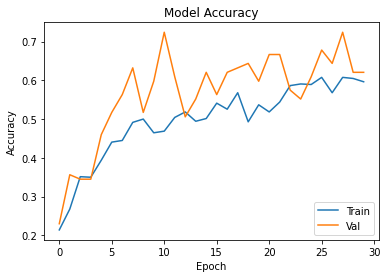

In [33]:
plt.plot(history_s2.history['accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 3rd CNN sequential API model indicates both loss and accuracy are in same trendline. However, learning curve in both train set & valid set their loss function slowly decreases into 1,10 and 1,00 respectively. Meanwhile, both train set's accuracy and valid set's accuracy indicates ~0,55. Actually, this model shows same typical trends for both loss and accuracy, but the value are still far from good fit.

In [34]:
# save trained model_s3
model_s3.save('model_s3.h5')

### CNN - Functional API

#### Build 1st Functional API Model

*Building with 2 branched convolutional layers with shared input where both branched layers involves 2 layers convolutional2D with different filters (1st layers: all filters 32 & 2nd layers: all filters 64) and maxpooling then flattening and concatenating prior fully-connected neural-networking  1 hidden layers (with 32 neurons) then setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. All activation function are using relu.*

In [39]:
# Declare 1st Functional API model
# defining shared inputs
inputs = Input(shape=(img_height, img_width, 3))

# convolutional + maxpooling: first branced layer feature extractor
conv1 = Conv2D(32, 3, activation='relu')(inputs)
pool1 = MaxPool2D(2)(conv1)
conv3 = Conv2D(32, 3, activation='relu')(pool1)
pool3 = MaxPool2D(2)(conv3)
flat1 = Flatten()(pool3)

# convolutional + maxpooling: second branced layer feature extractor
conv2 = Conv2D(64, 3, activation='relu')(inputs)
pool2 = MaxPool2D(2)(conv2)
conv4 = Conv2D(64, 3, activation='relu')(pool2)
pool4 = MaxPool2D(2)(conv4)
flat2 = Flatten()(pool4)

# merging feature extractors
merge = concatenate([flat1, flat2])

# neural-networking
hidden1 = Dense(32, activation='relu')(merge)
dropout = Dropout(0.3)(hidden1)

# prediction output
outputs = Dense(8, activation='softmax')(dropout)
model_f1 = Model(inputs=inputs, outputs=outputs)

*Using optimizer 'adam' refers to most favorable optimizer, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning*

In [40]:
# Compile 1st Functional API model

model_f1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

*Using input train_data_augmented for training and valid_data for validation, with 30 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [41]:
# Train 1st Functional API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_f1 = model_f1.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 59s 3s/step - loss: 2.8209 - accuracy: 0.1742 - val_loss: 1.5429 - val_accuracy: 0.3678 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 55s 2s/step - loss: 1.7527 - accuracy: 0.2054 - val_loss: 1.5017 - val_accuracy: 0.3678 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 56s 2s/step - loss: 1.5551 - accuracy: 0.3173 - val_loss: 1.3393 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 56s 2s/step - loss: 1.5808 - accuracy: 0.3159 - val_loss: 1.2777 - val_accuracy: 0.4368 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 56s 2s/step - loss: 1.4268 - accuracy: 0.3399 - val_loss: 1.2970 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 55s 2s/step - loss: 1.3854 - accuracy: 0.3527 - val_loss: 1.2230 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 55s 2s/step - loss: 1.3327 - a

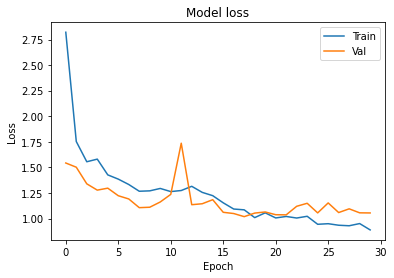

In [42]:
# Plot loss & accuracy of 1st Functional API model

plt.plot(history_f1.history['loss'])
plt.plot(history_f1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

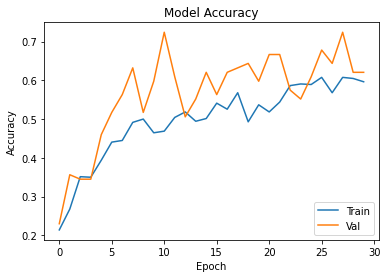

In [43]:
plt.plot(history_s2.history['accuracy'])
plt.plot(history_s2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 1st CNN functional API model indicates loss has different trendline between train and val set while accuracy has same trendline. However, learning curve in both train set & valid set their loss function slowly decreases into 0,90 and 1,00 respectively. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,62 and 0,66 respectively. Actually, this model shows same typical trends for both loss and accuracy, but the value are still far from good fit.

In [44]:
# save trained model_f1
model_f1.save('model_f1.h5')

#### Build 2nd Functional API Model

*Building with 2 branched convolutional layers with shared input where both branched layers involves 3 layers convolutional2D with same filters (32, 64, 128 with kernel 3x3) and maxpooling, then flattening and concatenating prior fully-connected neural-networking  1 hidden layers (with 32 neurons) then setting up dropout 0.3 which means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. All activation function are using relu.*

In [57]:
# Declare 2nd Functional API model
# defining shared inputs
inputs = Input(shape=(img_height, img_width, 3)) 

# convolutional + maxpooling: first branced layer feature extractor
conv1 = Conv2D(32, 3, activation='relu')(inputs)
pool1 = MaxPool2D(2)(conv1)
conv3 = Conv2D(64, 3, activation='relu')(pool1)
pool3 = MaxPool2D(2)(conv3)
conv5 = Conv2D(128, 3, activation='relu')(pool3)
pool5 = MaxPool2D(2)(conv5)
flat1 = Flatten()(pool5)

# convolutional + maxpooling: second branced layer feature extractor
conv2 = Conv2D(32, 3, activation='relu')(inputs)
pool2 = MaxPool2D(2)(conv2)
conv4 = Conv2D(64, 3, activation='relu')(pool2)
pool4 = MaxPool2D(2)(conv4)
conv6 = Conv2D(128, 3, activation='relu')(pool4)
pool6 = MaxPool2D(2)(conv6)
flat2 = Flatten()(pool6)

# merging feature extractors
merge = concatenate([flat1, flat2])

# neural-networking
hidden1 = Dense(32, activation='relu')(merge)
dropout = Dropout(0.3)(hidden1)

# prediction output
outputs = Dense(8, activation='softmax')(dropout)
model_f2 = Model(inputs=inputs, outputs=outputs)

*Using optimizer 'adam' refers to most favorable optimizer, loss function 'categorical_crossentropy' since expected output is the most highest probability between class ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'], and metrics 'accuracy' for monitoring in model learning*

In [58]:
# Compile 2nd Functional API model

model_f2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

*Using input train_data_augmented for training and valid_data for validation, with 30 epochs for in model learning, and ReduceLROnPlateau callbacks*

In [59]:
# Train 2nd Functional API model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_f2 = model_f2.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 59s 3s/step - loss: 2.5690 - accuracy: 0.1841 - val_loss: 1.6845 - val_accuracy: 0.3448 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 55s 2s/step - loss: 1.7263 - accuracy: 0.2748 - val_loss: 1.5330 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 55s 2s/step - loss: 1.4440 - accuracy: 0.3329 - val_loss: 1.4438 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 55s 2s/step - loss: 1.3038 - accuracy: 0.3895 - val_loss: 1.2946 - val_accuracy: 0.4368 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 55s 2s/step - loss: 1.2925 - accuracy: 0.3994 - val_loss: 1.3175 - val_accuracy: 0.4598 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 55s 2s/step - loss: 1.2798 - accuracy: 0.4235 - val_loss: 1.1719 - val_accuracy: 0.4368 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 55s 2s/step - loss: 1.2989 - a

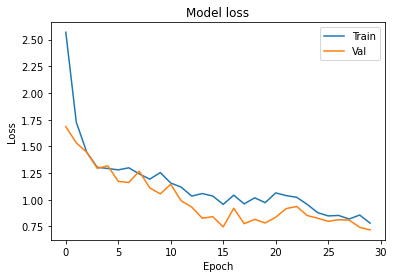

In [60]:
# Plot loss & accuracy of 2nd Functional API model

plt.plot(history_f2.history['loss'])
plt.plot(history_f2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

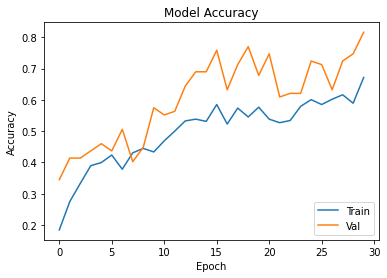

In [61]:
plt.plot(history_f2.history['accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 2nd CNN functional API model indicates, both loss and accuracy has similiar trendline between train and val set. However, learning curve in both train set & valid set their loss function slowly decreases into 0,78 and 0,71 respectively. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,67 and 0,81 respectively. Actually, this model shows same typical trends for both loss and accuracy, probably it will be good fit if epochs extended.

In [71]:
# save trained model_f2
model_f2.save('model_f2.h5')

#### Selecting Model to be Evaluated

After training 3 different sequential API model and 2 different functional model, then evaluating each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss can be nominated as best model among the others.

2nd Functional API model is selected as best model because its loss function value is quite good (around 0,75) and its degree of discrepancy 0,07 points for loss between train and valid set.

## viii. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### Model Evaluation in Test Set

In [87]:
# Predict and evaluate model on test set
y_pred_test = model_f2.predict(test_data)
y_pred_test = y_pred_test.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.83      0.83      0.83        12
           2       0.75      0.60      0.67        10
           3       0.77      0.83      0.80        12
           4       0.60      0.90      0.72        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        15
           7       0.79      0.73      0.76        15

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



In [75]:
test_data.class_indices

{'Anthracnose': 0,
 'algal leaf': 1,
 'bird eye spot': 2,
 'brown blight': 3,
 'gray light': 4,
 'healthy': 5,
 'red leaf spot': 6,
 'white spot': 7}

The context of this model evaluation is to look for metrics how much the amount of tea leaves's diseases data that can be predicted correctly as it is. So it is necessary to evaluate the *high recall* model which is able to reduce the degree of error prediction or misclassification.

Based on evaluation metrics above, it can be seen that 2ns CNN Functional Model as best model so far indicites good result in recall score in Class 1 (algal leaf), Class 3 (brown blight), Class 4 (gray light), Class 5 (healthy), Class 6 (red leaf spot), and Class 7 (white spot). While, Class 0 (Anthracnose) and Class 2 (bird eye spot) are poor result in recall score.

If we look back to images in Class 0 and Class 2, mostly the backgrounds tend to purple or highly tint degree and low brightness. It probably causes bias during training and prediction.



## ix. Model Improvement

> Pada bagian ini, dilakukan upaya improvisasi model yang harus menunjukkan bagaimana performa model membaik berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

Model improvement that will be taken to this case is by using pretrained model. As we know that pretrained model has been established with large scale of images resource in 'Imagenet' and developed them as transfer learning. Put it simply, transfer learning allows us to use a pre-existing model, trained on a huge dataset, for our own tasks. Consequently reducing the cost of training new deep learning models and since the datasets have been vetted, we can be assured of the quality.

#### Transfer Learning - RestNet50V2

*ResNet50V2 is a modified version of ResNet50 that performs better than ResNet50 and ResNet101 on the ImageNet dataset. In ResNet50V2, a modification was made in the propagation formulation of the connections between blocks. By using transfer learning / pretrained model, model is expectedly improved.*

In [67]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

# Declare 1st Pretrained model
base_model = ResNet50V2(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

# freeze model
base_model.trainable = False

94683136/94668760 [==============================] - 2s 0us/step


In [70]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Build 1st Fine Tuning/Improvement of Model
model_ft1 = Sequential()
model_ft1.add(base_model)
model_ft1.add(GlobalAveragePooling2D())
model_ft1.add(Flatten())
model_ft1.add(Dense(32, activation='relu'))
model_ft1.add(Dense(8, activation='softmax'))

# Compile 1st Fine Tuning/Improvement of Model
model_ft1.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train 1st Fine Tuning/Improvement of Model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_ft1 = model_ft1.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 62s 3s/step - loss: 1.6630 - accuracy: 0.4207 - val_loss: 1.3528 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 56s 2s/step - loss: 1.0893 - accuracy: 0.6147 - val_loss: 1.0365 - val_accuracy: 0.5632 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 55s 3s/step - loss: 0.7768 - accuracy: 0.7394 - val_loss: 0.8792 - val_accuracy: 0.6552 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 56s 2s/step - loss: 0.6816 - accuracy: 0.7635 - val_loss: 0.9085 - val_accuracy: 0.6322 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 57s 2s/step - loss: 0.5314 - accuracy: 0.8017 - val_loss: 0.8506 - val_accuracy: 0.7011 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 56s 2s/step - loss: 0.4929 - accuracy: 0.8329 - val_loss: 0.9212 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 56s 2s/step - loss: 0.4131 - a

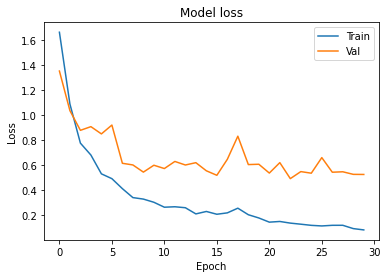

In [72]:
# Plot loss & accuracy of 1st Fine Tuning CNN model

plt.plot(history_ft1.history['loss'])
plt.plot(history_ft1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

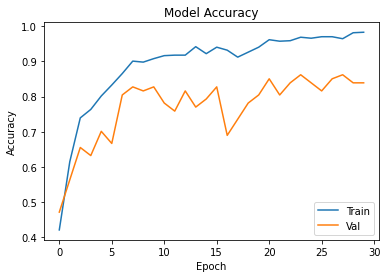

In [73]:
plt.plot(history_ft1.history['accuracy'])
plt.plot(history_ft1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 1st fine-tuned CNN model indicates, both loss and accuracy has similiar trendline between train and val set. However, learning curve in both train set & valid set their loss function slowly decreases into 0,10 and 0,52 respectively and still apart around 0,40 points. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,98 and 0,83 respectively and still apart around 0,15 points. This model with pretrained RestNet50V2 shows improvement in loss function and accuracy.

In [74]:
# save trained model_ft1
model_ft1.save('model_ft1.h5')

#### Transfer Learning - InceptionV3

*Inception-v3 is a convolutional neural network architecture from the Inception family that makes several improvements including using Label Smoothing, Factorized 7 x 7 convolutions, and the use of an auxiliary classifer to propagate label information lower down the network (along with the use of batch normalization for layers in the sidehead). By using transfer learning / pretrained model, model is expectedly improved.*

In [76]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Declare 2nd Pretrained model
base_model = InceptionV3(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

# freeze model
base_model.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [78]:
# Build 2nd Fine Tuning/Improvement of Model
model_ft2 = Sequential()
model_ft2.add(base_model)
model_ft2.add(GlobalAveragePooling2D())
model_ft2.add(Flatten())
model_ft2.add(Dense(32, activation='relu'))
model_ft2.add(Dense(8, activation='softmax'))

# Compile 2nd Fine Tuning/Improvement of Model
model_ft2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train 2nd Fine Tuning/Improvement of Model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=0.0001)

# earlystop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)
history_ft2 = model_ft2.fit(train_data_augmented, epochs=30, validation_data=valid_data, callbacks=[reduce_lr])

Epoch 1/30
23/23 [==============================] - 64s 3s/step - loss: 1.7972 - accuracy: 0.3314 - val_loss: 1.6122 - val_accuracy: 0.3908 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 56s 2s/step - loss: 1.3434 - accuracy: 0.5496 - val_loss: 1.2883 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 56s 2s/step - loss: 1.0874 - accuracy: 0.6133 - val_loss: 1.1400 - val_accuracy: 0.5977 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 56s 2s/step - loss: 0.9542 - accuracy: 0.6799 - val_loss: 1.0137 - val_accuracy: 0.6437 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 56s 2s/step - loss: 0.8490 - accuracy: 0.6941 - val_loss: 0.9067 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 56s 2s/step - loss: 0.7679 - accuracy: 0.7351 - val_loss: 0.9062 - val_accuracy: 0.6552 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 56s 2s/step - loss: 0.6995 - a

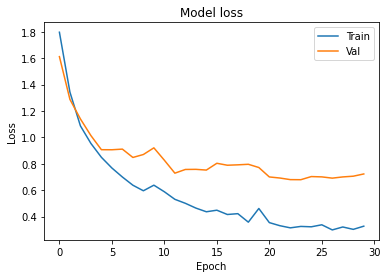

In [79]:
# Plot loss & accuracy of 2nd Fine Tuning CNN model

plt.plot(history_ft2.history['loss'])
plt.plot(history_ft2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

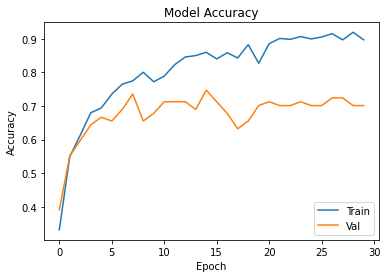

In [80]:
plt.plot(history_ft2.history['accuracy'])
plt.plot(history_ft2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see that 2nd fine-tuned CNN model indicates, both loss and accuracy has similiar trendline between train and val set. However, learning curve in both train set & valid set their loss function slowly decreases into 0,32 and 0,72 respectively and still apart around 0,40 points. Meanwhile, both train set's accuracy and valid set's accuracy indicates 0,90 and 0,70 respectively and still apart around 0,20 points. This model with pretrained InceptionV3 shows improvement in loss function and accuracy.

In [81]:
# save trained model_ft2
model_ft2.save('model_ft2.h5')

#### Model Evaluation in Test Set after Fine Tuning / Improvement

In [85]:
# Predict and evaluate model on test set by 1st fine-tuned CNN Model
y_pred_test_ft = model_ft1.predict(test_data)
y_pred_test_ft = y_pred_test_ft.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test_ft))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.92      1.00      0.96        12
           2       0.67      0.60      0.63        10
           3       1.00      0.83      0.91        12
           4       0.62      0.80      0.70        10
           5       1.00      0.75      0.86         8
           6       1.00      1.00      1.00        15
           7       0.83      1.00      0.91        15

    accuracy                           0.84        92
   macro avg       0.83      0.81      0.81        92
weighted avg       0.84      0.84      0.83        92



In [92]:
# Predict and evaluate model on test set by 2nd fine-tuned CNN Model
y_pred_test_ft2 = model_ft2.predict(test_data)
y_pred_test_ft2 = y_pred_test_ft2.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test_ft2))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       1.00      0.92      0.96        12
           2       0.64      0.90      0.75        10
           3       0.67      0.83      0.74        12
           4       0.70      0.70      0.70        10
           5       1.00      0.88      0.93         8
           6       1.00      0.87      0.93        15
           7       0.79      0.73      0.76        15

    accuracy                           0.79        92
   macro avg       0.80      0.79      0.79        92
weighted avg       0.81      0.79      0.80        92



In [88]:
# Predict and evaluate model on test set
y_pred_test = model_f2.predict(test_data)
y_pred_test = y_pred_test.argmax(axis=1)
y_test = test_data.classes
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.83      0.83      0.83        12
           2       0.75      0.60      0.67        10
           3       0.77      0.83      0.80        12
           4       0.60      0.90      0.72        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        15
           7       0.79      0.73      0.76        15

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



The context of this model evaluation is to look for metrics how much the amount of tea leaves's diseases data that can be predicted correctly as it is. So it is necessary to evaluate the *high recall* model which is able to reduce the degree of error prediction or misclassification (False Negative).

Based on evaluation metrics above, it can be seen that 2nd fine-tuned CNN model indicites better result than 1st fine-tuned CNN model, which their improvement result good recall score in Class 1 (algal leaf), Class 2 (brown blight) from 0,83 to 0,92 and 0,60 to 0,90. Besides, after fine-tuning overfitting on Class 5 and Class 6 do not happen. Unfortunately, Class 0 remains unchanged recall score, still 0,50. 

We can assumse that problem of backgrounds have not been resolved by fine tuning even with pretrained. It would be better if a special preprocessing is conducted in Class 0 such us brightness adjustment, background color adjustment, etc for further improvements.


Model probably will make wrong predictions if we use picture with background bias for inference. In real case, diseases which are infecting tea leaf not only one kind of disease, but also possibly in two kinds in a time, if this condition happens, model will be incorrectly making classification.

Other limitation in these training models is about dataset pictures itself, because its dataset only display in single leaf, however in real life and practical-wise tea leaves are usually consisted of some leaves not cut off from branched if we take a picture for inferencing.

## ix. Model Saving

> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [94]:
model_ft2.trainable = False
model_ft2.save('tea_leaves_diseases')

INFO:tensorflow:Assets written to: tea_leaves_diseases/assets


INFO:tensorflow:Assets written to: tea_leaves_diseases/assets


## x. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [129]:
# inference
from google.colab import files

files.upload()

Saving inference.png to inference.png


{'inference.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xd2\x00\x00\x00\xf4\x08\x06\x00\x00\x00\xeelxi\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\xff\xa5IDATx^l\xfd\xe7\x8fw\xcb\x96\xdf\x87U\xf7\xafs\xee~\xd2\xc99\xdfs\xef\x1dN"m\x9a\xa4$\x1a$`I\x80i\x1b\x16\x01\xbf\xf6\x1b\xc3\xf0\x1b\xff\x03\x0f\x9c\x00\xfb\xbf0l\x01\x0e\x80m\x80\x14l\xcb\xb2d\x91\xa2HJ"93\x9c\xe1\xdc\xb9s\xc3\t\xf7\x84\'v\xce\xc9\x9f\xcfwUu\xf7\x19\xaa~\xbd{\xd7\xae\xb0j\xd5\xaa\x95\xaav\xed\xbd\xa7\xfe\x1f\xff\xfb\xc7\xd7SSS\xed\xfa\xfa\xba\x19\x88\xb6\xa9\xeb\xab\\_\xb7\xe9\x9c\xa7\xa6\xa7\xc9\xb9nWW\xc4\xc97\\Sfj\xaa\xe7\xdf\xa9\xefi\x941\xdfz\x81\xd5\xf3-;\xc2\xa8{\xe5\x99\xeb\xab\xab\xabT\x1e%\xcc\xaf6I#\xd1\xf3\xe5%en`\xde\xb6e]\xb0\xe6z\xd2\xa6\xaf-\xcc\xb5\xf0\x806\xdaN{\xd3\xe4q9\xd2\x0cWW\x97\xc0\xbd\xacv\xda\xc4l\x0b\xd4\xd9@\xfc\xb2_Mq\xba\xbc\xb8\x10lk\xd0%0\xc1\xd1sp\xb0^\xefG\xc1\xa

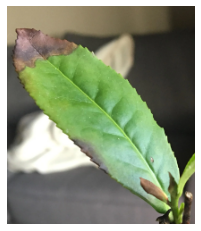

In [131]:
new_img = mpimg.imread('inference.png')
plt.imshow(new_img);
plt.axis(False);

In [132]:
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize

# create function for load and preprocess
def load_and_preprocess(filename, img_shape=224):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [133]:
# inference image after load and preprocess
new_img = load_and_preprocess('inference.png')
new_img.shape

TensorShape([224, 224, 3])

In [134]:
from tensorflow import expand_dims

# adjust dimension of image prior performing predictions
new_img = expand_dims(new_img, axis=0)
new_img.shape

TensorShape([1, 224, 224, 3])

In [135]:
inference = model_ft2.predict(new_img)
inference.argmax()

6

In [136]:
files.upload()

Saving inference2.png to inference2.png


{'inference2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb9\x00\x00\x01\x15\x08\x06\x00\x00\x00}\x8a\x9b\xbd\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\xff\xa5IDATx^\xac\xfdg\x93m9\x92\xae\x89!\xe4\x0eyT\xaa\xca\xeaj1W\xcc\xd8\xd8\x18\xbf\xd0\xc8\xffW?\x91F3~\xa0\x19I\xe3\x88;\xdd\xd5\x95\x99G\x85\x96|\x9e\xf7\x05v\xc4\xc9\xae\xbe\x1c\xda\x10;\x10\xc0\x82p\xb8;\x1c\xee\x00\x16\xd6Z;\x7f\xf8\x0f\xff\xc7\xe7\x87\x87\xdb\xb1\xfc#~\xf7\xf1q\xec<?\x8d\xa7\xf1<\x06a\x02\xff\xe9\x9e\xb7\xb11v\xf0\\\xa7@\xa2&\xe0vz\xbd3/\xe3v\xfd\xb73v\twv\x9b\xb1c\xda\x8c\xeb\xbc\xde\xf5\x1ao\xb9\xf8=\xe3;\xadC|\x8f\xc4\x1d3Ra\x8bI\\0\x99\xe8<\xd3V\xe3\xe0;\x8b\xad\x96v\x84\xb9\xbf3\x0e\x0fw\xeb7{\t\xf7\x0f\xf7\xeb\x0f\xf6\xc6\xc1\xfe\xfe88\xc0\xef\x1f\xd0\xe6\x1e(\xed\x8f\xe7\xdd}x\x02.\xcf\xfb\xf8=X\xf34\x1e\x1f\xef\xe1\xdb\xfd\xb8\x7fx\x1c\xf7\x8f\x0f\xb9\xd6?\xeb\xc7\x03\xed\xc3G\xf1\t

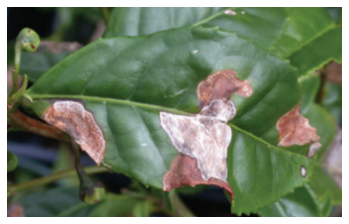

In [137]:
new_img2 = mpimg.imread('inference2.png')
plt.imshow(new_img2);
plt.axis(False);

In [139]:
# inference image after load and preprocess
new_img2 = load_and_preprocess('inference2.png')
new_img2.shape

TensorShape([224, 224, 3])

In [140]:
# adjust dimension of image prior performing predictions
new_img2 = expand_dims(new_img2, axis=0)
new_img2.shape

TensorShape([1, 224, 224, 3])

In [141]:
inference2 = model_ft2.predict(new_img2)
inference2.argmax()

2

## xi. Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

#### Recap of EDA


Datasets are consisted of :
- Total all images 		      : 885
- Total algal leaf images 	: 113
- Total anthracnose images 	: 100
- Total bird eye spot images: 100
- Total brown blight images : 113
- Total gray light images 	: 100
- Total healthy leaf images : 74
- Total red leaf spot images: 143
- Total white spot images 	: 142

From the enlisted dimension from each classes, we can see that all images are RGB with 3 channel of color spectrum. algal leaf has same dimension: 1024 x 768, anthracnose mostly has same dimension with different orientation: portrait 4160 x 3120 and landscape 3120 x 4160, bird eye spot mostly has same dimension with different orientation: portrait 4160 x 3120 and landscape 3120 x 4160, brown blight has same dimension: 1024 x 768, healthy mostly has two dimensions: 1024 x 768 & 1024 x 1024, and red leaf spot mostly has similiar dimension: 1024 x 768.

From the preview images from each classes, we can see that each leaves have different particular characteristics from their own color, their rip, or their spotness.

Some of group of Classes are easily to be distinguished as object since the backgrounds are quite contrast to the leaf while the others are probably not taken pictures in proper lighting, such as class: anthracnose, bird eye spot, and gray light.

#### Recap of Preprocessing

Datasets are splitted into 3 folders as follows:
- train dataset (80%): 706 images belonging to 8 classes
- valid dataset (10%): 87 images belonging to 8 classes
- test dataset (10%): 92 images belonging to 8 classes

Then, two type of preprocessing of images are performed by rescaling only and augmented: rescaling + rotation (randomized up to 20%) + zoom (randomized up to 20%) + horizontal flip (randomized) since images typically still make sense if we slightly rotate or zoom or horizontal flip.

#### Recap of Model Definition & Model Training

In this case, an objectives which is expected to be performed is computer vision with Convolutional Neural Network model that able to identify classification of disease in tea leaves from dataset. Hence, there are two types of convolutionl neural network which will be trained and evaluated as follows:

1. **CNN - Sequential API** 
2. **CNN - Functional API**

After training 3 different CNN sequential API model and 2 different CNN functional API model, then evaluating each models by their learning curve and the plotting of loss function - accuracy gradient between train and valid set. We can conclude that model which has the least loss function and the slightest degree of discrepancy in loss can be nominated as best model among the others.

**2nd CNN Functional API model** is selected as best model because its loss function value is quite good (around 0,75) and its degree of discrepancy 0,07 points for loss between train and valid set.

#### Recap of Model Evaluation & Model Improvement

The context of this model evaluation is to look for metrics how much the amount of tea leaves's diseases data that can be predicted correctly as it is. So it is necessary to evaluate the *high recall* model which is able to reduce the degree of error prediction or misclassification.

Based on evaluation metrics above, it can be seen that 2ns CNN Functional Model as best model so far indicites good result in recall score in Class 1 (algal leaf), Class 3 (brown blight), Class 4 (gray light), Class 5 (healthy), Class 6 (red leaf spot), and Class 7 (white spot). While, Class 0 (Anthracnose) and Class 2 (bird eye spot) are poor result in recall score.

If we look back to images in Class 0 and Class 2, mostly the backgrounds tend to purple or highly tint degree and low brightness. It probably causes bias during training and prediction.

Model improvement that will be taken to this case is by using pretrained model. As we know that pretrained model has been established with large scale of images resource in 'Imagenet' and developed them as transfer learning. Put it simply, transfer learning allows us to use a pre-existing model, trained on a huge dataset, for our own tasks. Consequently reducing the cost of training new deep learning models and since the datasets have been vetted, we can be assured of the quality.

There are two kind established of transfer learnign that will be evaluated prior choosen as model improvement as follows:
- RestNet50V2
  - ResNet50V2 is a modified version of ResNet50 that performs better than ResNet50 and ResNet101 on the ImageNet dataset. In ResNet50V2, a modification was made in the propagation formulation of the connections between blocks. By using transfer learning / pretrained model, model is expectedly improved.
- InceptionV3
  - Inception-v3 is a convolutional neural network architecture from the Inception family that makes several improvements including using Label Smoothing, Factorized 7 x 7 convolutions, and the use of an auxiliary classifer to propagate label information lower down the network (along with the use of batch normalization for layers in the sidehead). By using transfer learning / pretrained model, model is expectedly improved.

The context of this model evaluation is to look for metrics how much the amount of tea leaves's diseases data that can be predicted correctly as it is. So it is necessary to evaluate the *high recall* model which is able to reduce the degree of error prediction or misclassification (False Negative).

Based on evaluation metrics above, it can be seen that 2nd fine-tuned CNN model indicites better result than 1st fine-tuned CNN model, which their improvement result good recall score in Class 1 (algal leaf), Class 2 (brown blight) from 0,83 to 0,92 and 0,60 to 0,90. Besides, after fine-tuning overfitting on Class 5 and Class 6 do not happen. Unfortunately, Class 0 remains unchanged recall score, still 0,50. 

We can assumse that problem of backgrounds have not been resolved by fine tuning even with pretrained. It would be better if a special preprocessing is conducted in Class 0 such us brightness adjustment, background color adjustment, etc for further improvements.

Model probably will make wrong predictions if we use picture with background bias for inference. In real case, diseases which are infecting tea leaf not only one kind of disease, but also possibly in two kinds in a time, if this condition happens, model will be incorrectly making classification.

Other limitation in these training models is about dataset pictures itself, because its dataset only display in single leaf, however in real life and practical-wise tea leaves are usually consisted of some leaves not cut off from branched if we take a picture for inferencing.

#### For Further Development



- Perhaps, another approach of preprocessing, in some class in which model is not able to distinguish very well need, is needed. Since, we know that in EDA and model evaluation has found those backgrounds are not constrast with leaf, may be we have to deal with some adjustment or trying different color space/spectrum approach. Hence, model will be focused only on leaf not to background bias.
- Since training cost & time is very limited, may be more longer epochs's cycle will bring better result in learning curve, lower loss functions.
- Adding more pictures into dataset to enrich variants, not only single leaf but also a group of leaves that still attach to branchs.

## **Thank you! Any feedback is very appreciated**